# Toy Example

In [1]:
import numpy as np
from tqdm import tqdm 
import matplotlib.pyplot as plt
import torch

### Using autograd

100%|██████████| 100/100 [00:00<00:00, 3826.47it/s]

-12632250368.0


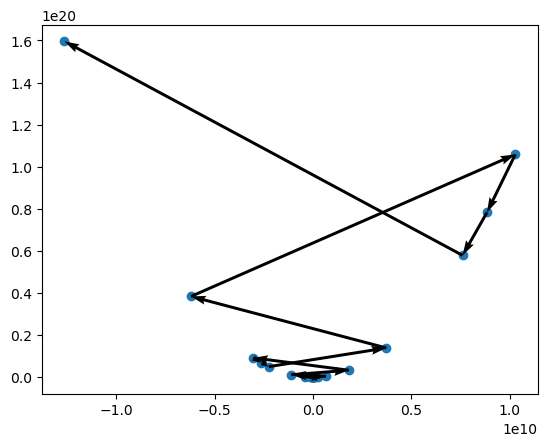

In [ ]:
class ToyExample:
    def __init__(self, as_, lr, iters, k, func_type):
        self.as_ = as_
        self.lr = lr
        self.iters = iters
        self.k = k
        
        self.rng = np.random.default_rng()
        if func_type=='quad':
            self.func = self.quad_func


    def rand_init_x(self):
        x = torch.distributions.uniform.Uniform(-10, 10).sample()
        x.requires_grad_(True)
        return x
    
    def expectation_a(self):
        return self.as_.sum()/len(self.as_)
    
    def quad_func(self, x, stochastic = True):    
        if stochastic:
            a_ = self.rng.choice(self.as_, size=1)[0]
        else:
            a_ = self.expectation_a()

        y = x*x*a_/self.k
        return y
    
    def optimize(self, x, stochastic = True):
        self.x_prog = [x.item()]
        self.f_prog = [self.func(x, False).item()]

        for _ in tqdm(range(self.iters)):
            y = self.func(x, stochastic=stochastic)
            y.backward()

            with torch.no_grad():
                # print(x.grad == x*a_)
                x.copy_(x - self.lr*x.grad)
                x.grad.zero_()

            self.x_prog.append(x.item())
            self.f_prog.append(self.func(x, False).item())

        return x.item()
    
    def plot(self):
        x_ax = np.linspace(-10, 10, 100)
        y_ax = np.array([self.func(x, stochastic=False) for x in x_ax])
        plt.plot(x_ax, y_ax)
        plt.scatter(self.x_prog, self.f_prog)

        diff_x = np.diff(self.x_prog)
        diff_f = np.diff(self.f_prog)
        plt.quiver(self.x_prog[:-1], self.f_prog[:-1], diff_x, diff_f, angles = 'xy', scale_units='xy', scale=1)
        plt.show()



lr = 0.7
iters = 100
k = 1
as_ = np.array([0.1, 1.9])
# as_ = np.array([1, 1])

toy = ToyExample(as_, lr, iters, k, 'quad')
x_opt = toy.optimize(toy.rand_init_x())

print(x_opt)
toy.plot()
    




tensor(-7.3786, requires_grad=True)


100%|██████████| 100/100 [00:00<00:00, 2699.85it/s]


np.float64(1.7475999999999994)

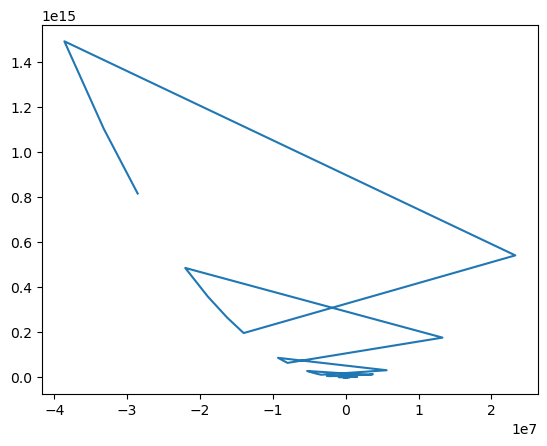

In [ ]:

rng = np.random.default_rng()


def expectation_a_square(as_):
    return np.square(as_).sum()/len(as_)

def var_a(as_):
    '''this is nothing but s^2'''
    return expectation_a_square(as_) - expectation_a(as_)**2

def calc_dynamic_value(a_, lr, k):
    return 1 - (2*lr*a_/k)

def func(x, as_, k = 2, stochastic=True):    
    if stochastic:
        a_ = rng.choice(as_, size=1)[0]
    else:
        a_ = expectation_a(as_)

    y = x*x*a_/k
    return y



x = torch.distributions.uniform.Uniform(-10, 10).sample()
x.requires_grad_(True)

print(x)


dynamics_rv = np.array([calc_dynamic_value(a_, lr, k) for a_ in as_])
dynamics_rv_square = np.square(dynamics_rv)

x_prog = [x.item()]
f_prog = [func(x, as_, k, stochastic=False).item()]

for _ in tqdm(range(iters)):
    y = func(x, as_, k, stochastic=True)
    y.backward()

    with torch.no_grad():
        # print(x.grad == x*a_)
        x.copy_(x-lr*x.grad)
        x.grad.zero_()

    x_prog.append(x.item())
    f_prog.append(func(x, as_, k, stochastic=False).item())



x_prog = np.array(x_prog)
f_prog = np.array(f_prog)

plt.plot(x_prog, f_prog)


dynamics_rv_square.mean()

In [ ]:
x

tensor(-28566612., requires_grad=True)

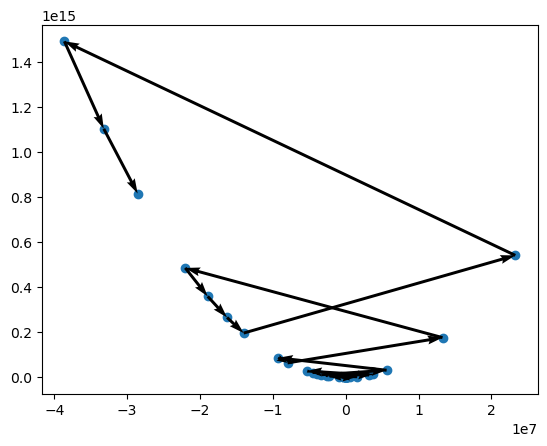

In [33]:
diff_f.shape, f_prog.shape

((100,), (101,))

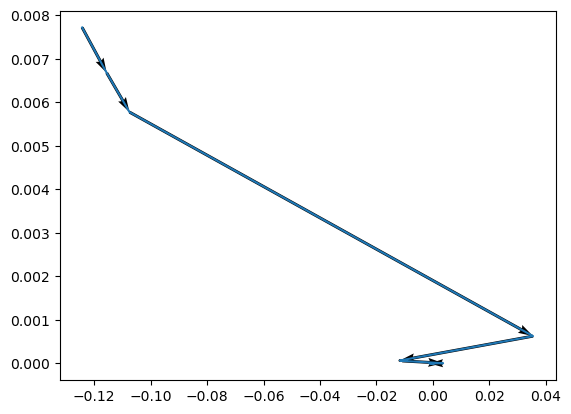

In [ ]:
plt.plot(x_prog, f_prog)


In [68]:
y_ax.dtype

dtype('float64')